# Unsupervised Learning - Final project
## Customer Segmentation

In this project, we will analyze consumer spending data to come up with ways to segment the population based on some demographic information and spending behavior.

Segmenting consumers is of particular importance to businesses as they will use the segmentation to tailor their marketing campaigns and offerings based on the consumer preferences and behaviors. The ultimate goal is to increase sales and revenue and better meet customer needs.

The dataset used in this project can be found in the Kaggle repository following this URL:

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

The only csv downloaded and utilized in the Mall_Customers.csv :

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python#:~:text=calendar_view_week-,Mall_Customers,-.csv


## 1. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In this section we will load the dataset, clean the data as required and perform some basic analysis on their contents.

Also we will visualize the different properties to get a first intuition on how we can create a model that best clusters the data in order to segment the customers in the study.

### Data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Statistical summary of the numerical columns
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [4]:
# Check for missing values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In our case, the data is already cleaned and there seems to be no outlier or value that needs to be taken out.

### Visualization

We wil now continue with some basic visualization of the different attributes and the distribution of their contents.

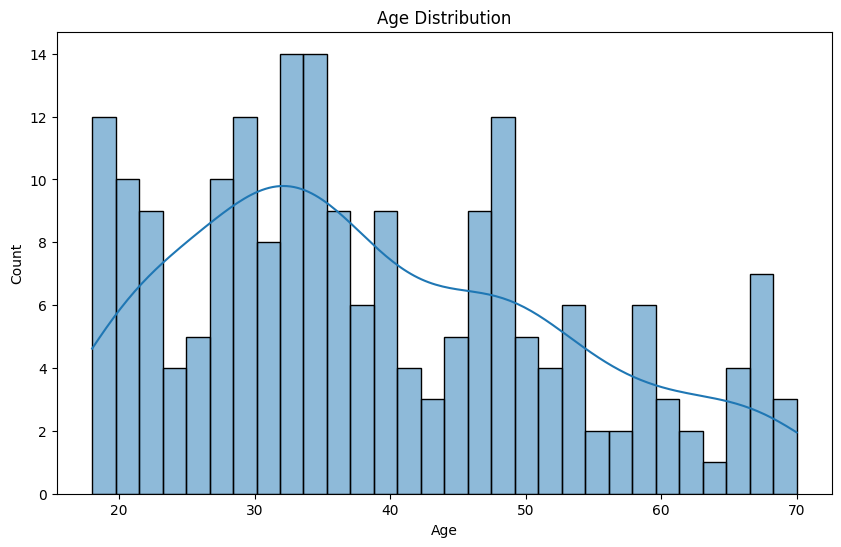

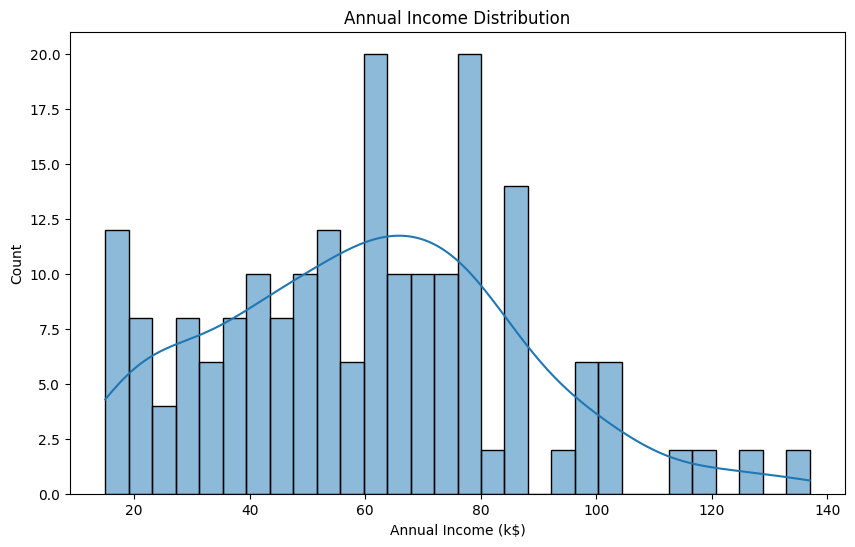

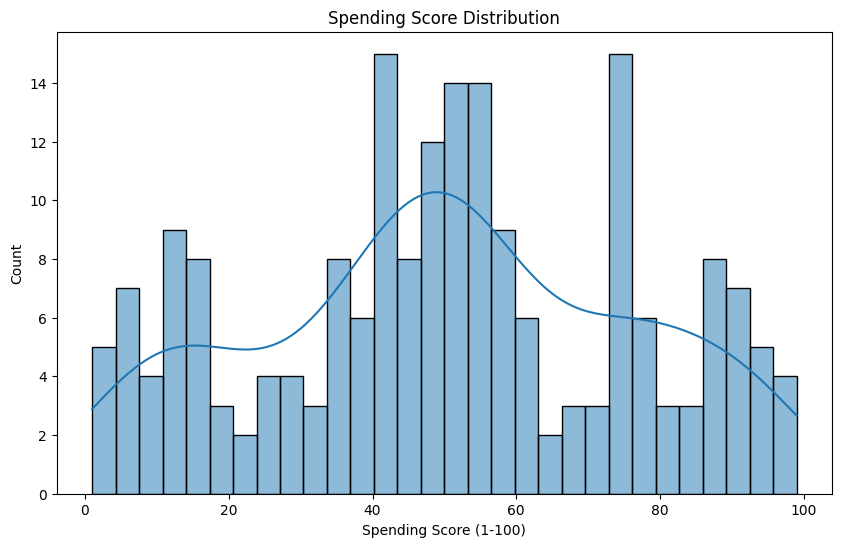

In [5]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Annual Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

# Spending Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.show()


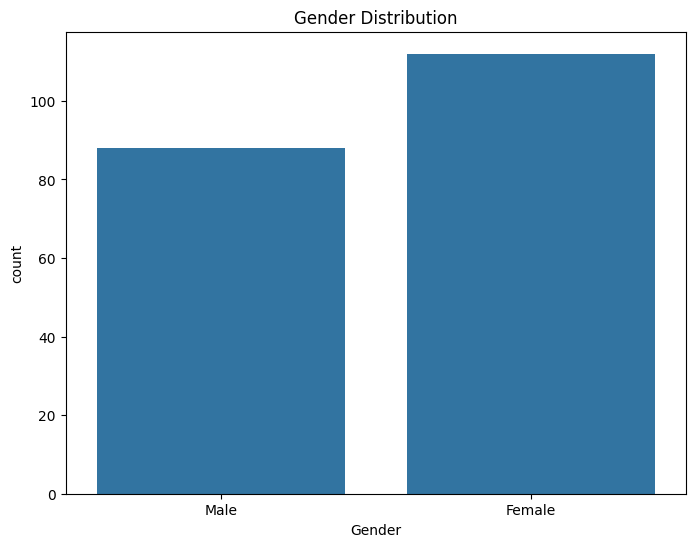

In [6]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


### Visualization conclusions

The basic visualization of the distribution does not reveal any anomaly about the contents nor anything that needs to be corrected.
The distribution of the annual income is skewed toward the low end (which is to be expected), the spending score might look like a normal distribution (which also is not suprising) and there are slightly more females than males in the population of buyers (which again, is nothing abnormal).

### Relationships

We will now explore the relationship between the different variables in order to find out if there is any correlation between them and shed some light on how the segementation by cluster will look like.

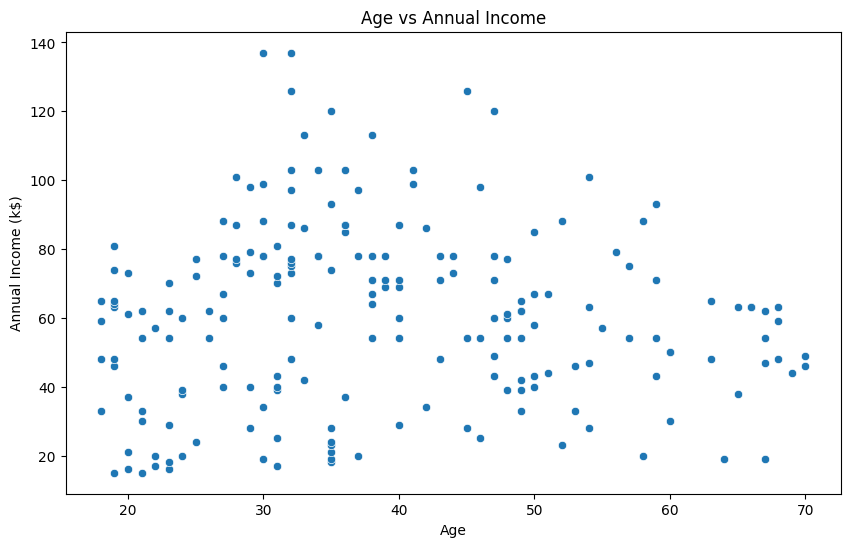

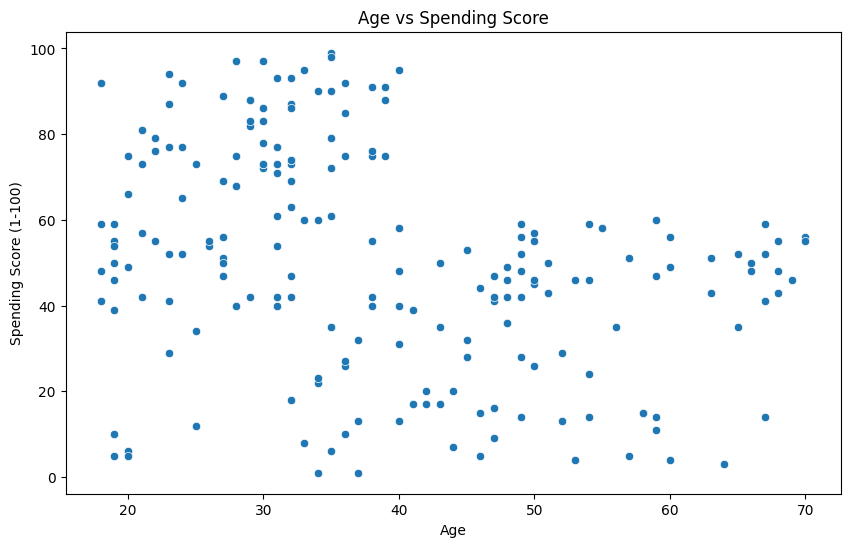

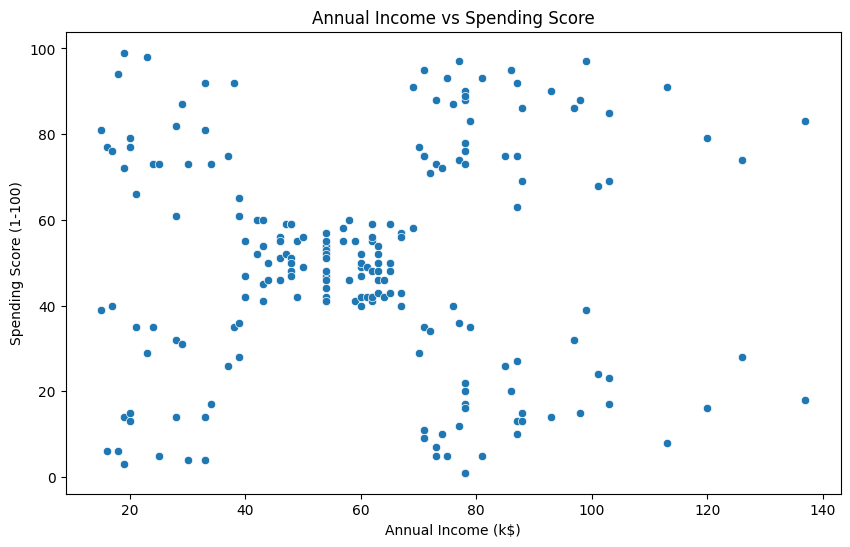

In [7]:
# Relationship between Age and Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Age vs Annual Income')
plt.show()

# Relationship between Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')
plt.show()

# Relationship between Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()


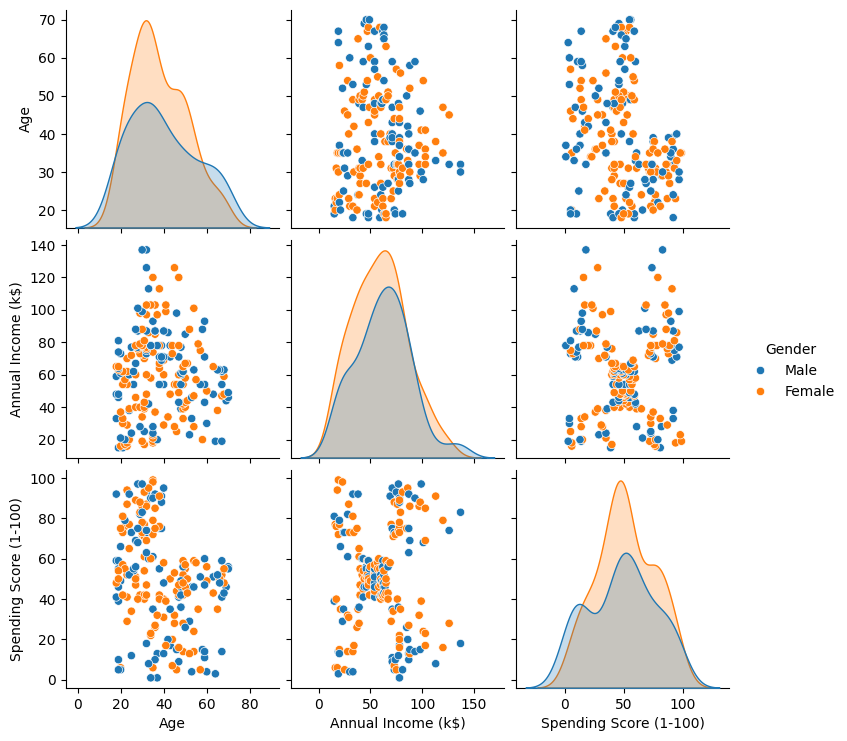

In [8]:
# Pairplot to visualize the relationships between features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.show()


### Relationship conclusion

After analyzing the different plots and pairplots, it is safe to assume that there is no linear correlation between the variables considered in this study.
When it comes to clustering, it looks like the annual income vs Spending score will provide the best way to interpret the data. We can already see that the data points delineate some well-defined clusters with concentrations around 5 points in the two dimensional plots.


## 2. Analysis, model building and training

Equipped with the intuition provided by these first visualization, we are now going to try different methods to cluster the data in order to produce the desired customer segmentation. 
We will start with 5 as a number of clusters following the preliminary visualizations and will then discuss what would be the optimal choice of number of clusters based on their interpretation for the customer segmentation problem at hand.

As an action needed for the analysis and visualization, we will now convert the gender into a numeric variable

In [9]:
from sklearn.preprocessing import LabelEncoder


# Encode the 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # 0 for Female, 1 for Male


### Clustering via K-means

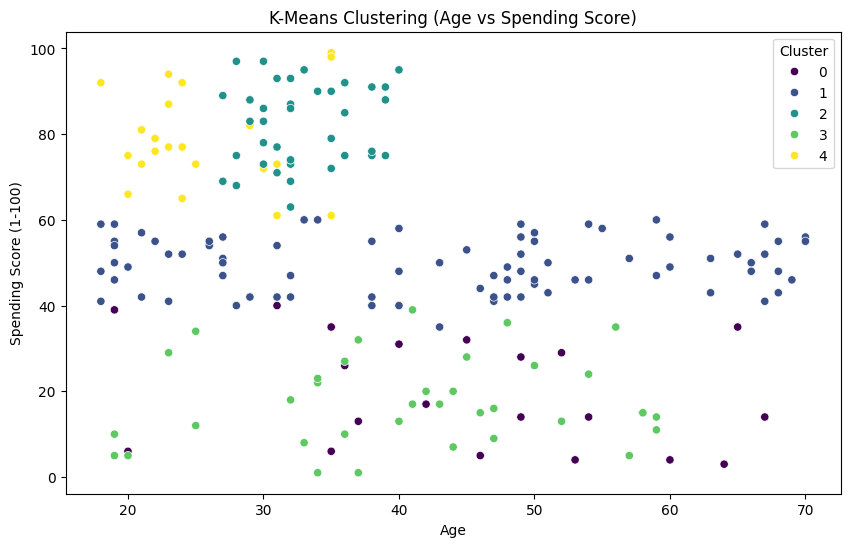

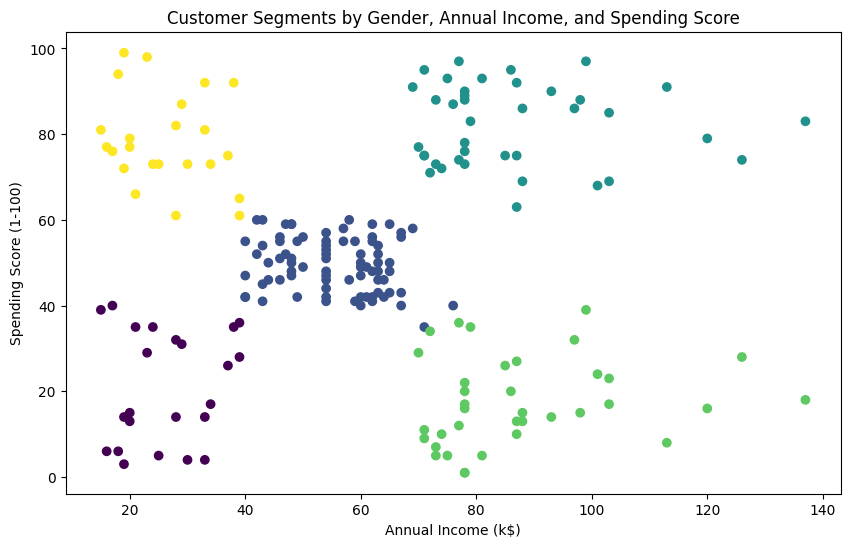

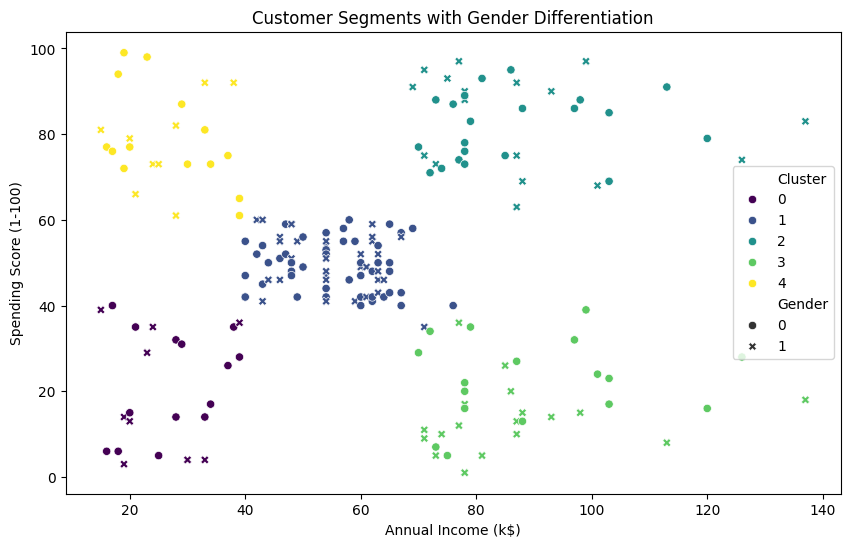

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the features for clustering including 'Gender'
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Define the model with a predefined number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Visualize K-Means Clustering results with Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df)
plt.title('K-Means Clustering (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Plotting the clusters based on Annual Income and Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by Gender, Annual Income, and Spending Score')
plt.show()

# Visualizing clusters considering Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', style='Gender', data=df, palette='viridis')
plt.title('Customer Segments with Gender Differentiation')
plt.show()

plt.show()


### Hierarchical Clustering

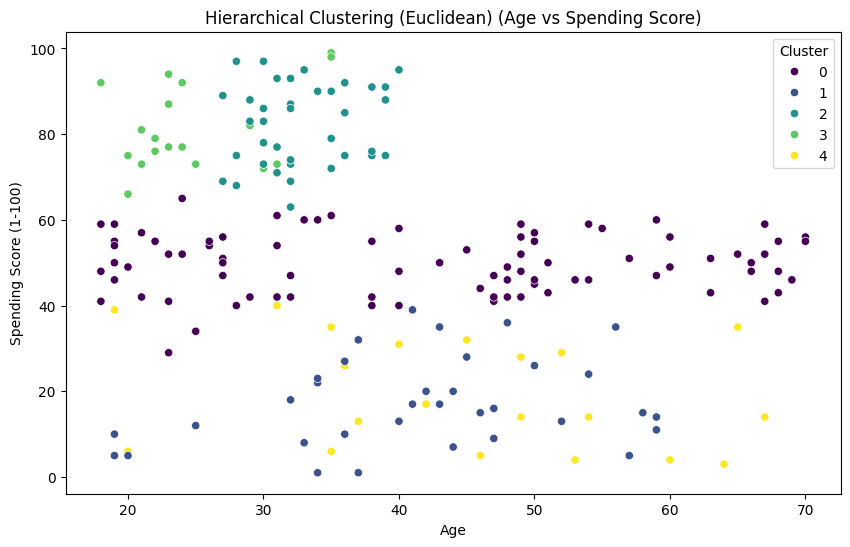

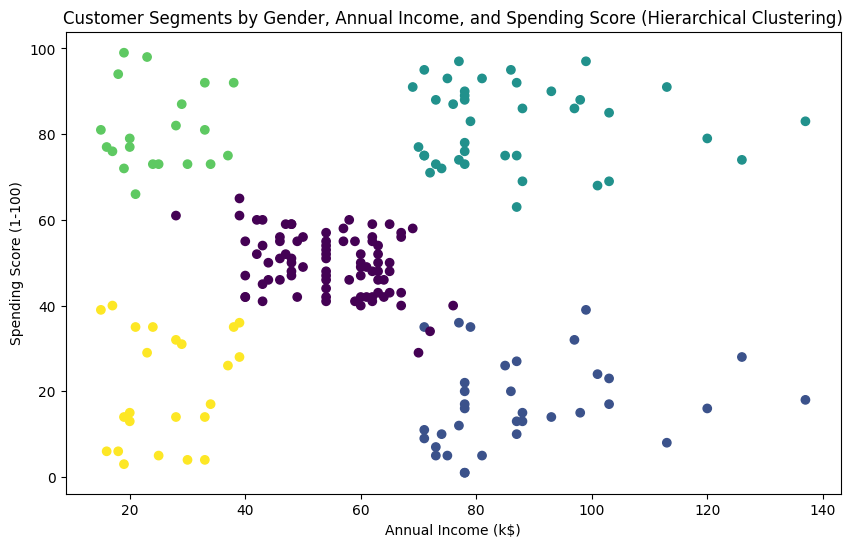

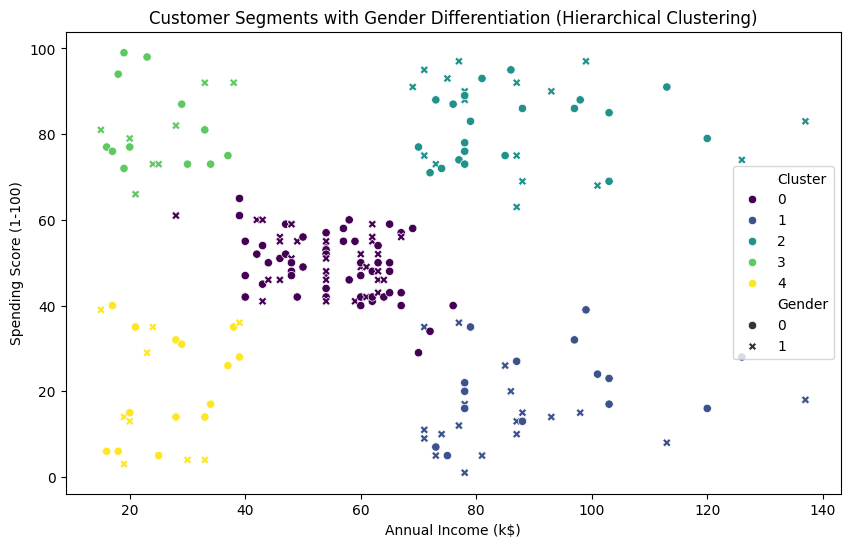

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Select the features for clustering including 'Gender'
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['Cluster'] = hierarchical.fit_predict(X)

# Visualize Hierarchical Clustering (Euclidean) results with Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df)
plt.title('Hierarchical Clustering (Euclidean) (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Plotting the clusters based on Annual Income and Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by Gender, Annual Income, and Spending Score (Hierarchical Clustering)')
plt.show()

# Optional: Visualize clusters considering Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', style='Gender', data=df, palette='viridis')
plt.title('Customer Segments with Gender Differentiation (Hierarchical Clustering)')
plt.show()


### Clustering with similarity (Cosine Distance)

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.pairwise import cosine_distances


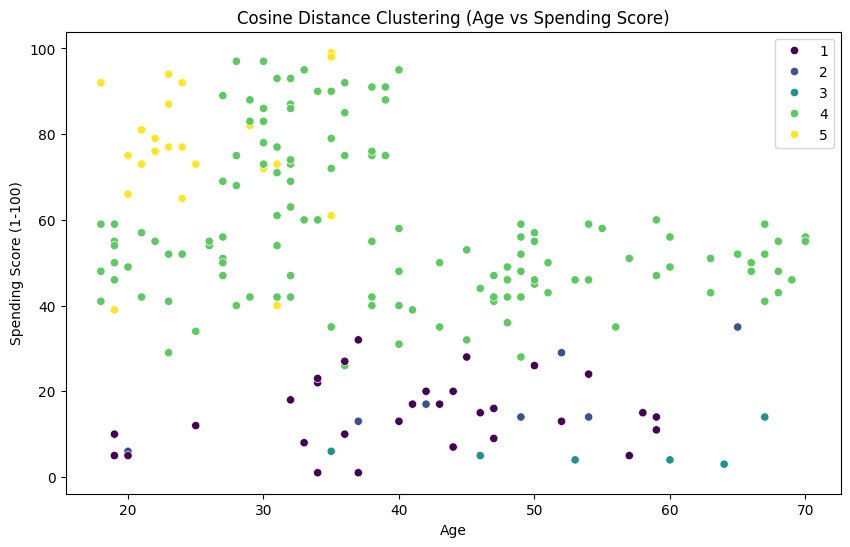

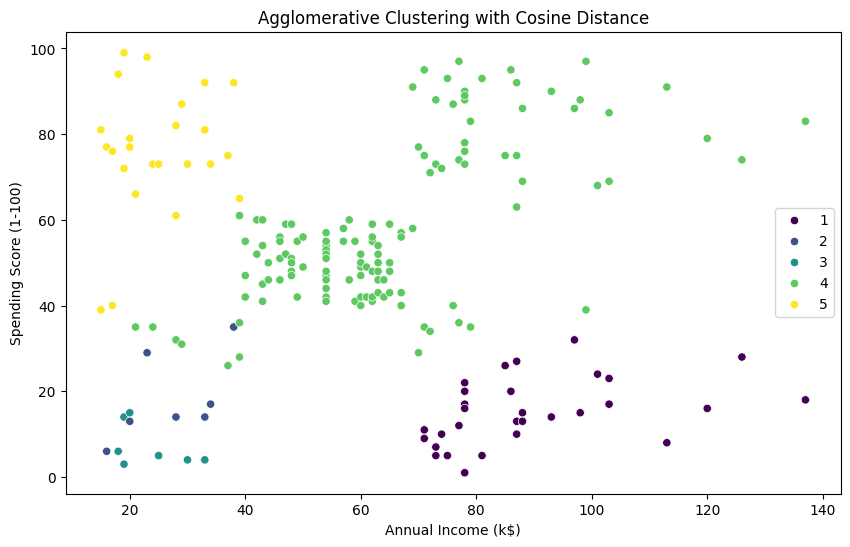

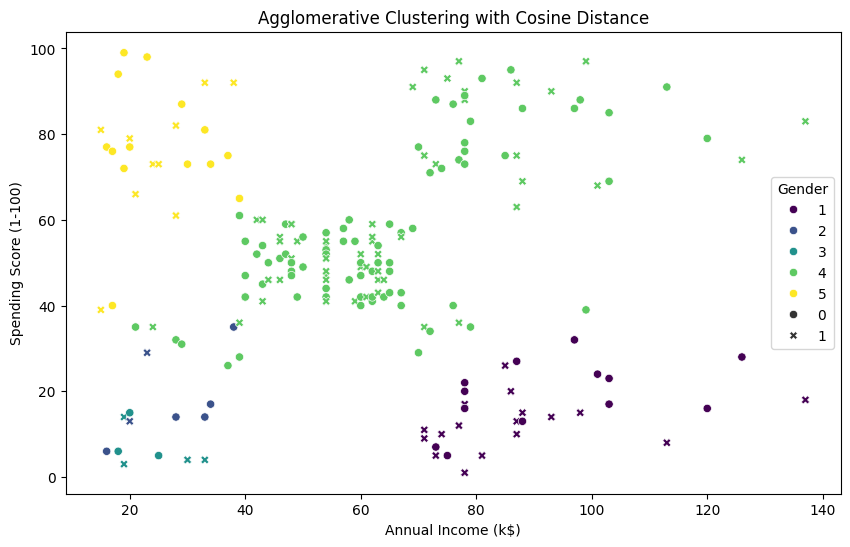

In [13]:
# Calculate the cosine distance matrix
cosine_dist = cosine_distances(X)

# Perform hierarchical clustering with cosine distance
linkage_matrix = linkage(cosine_dist, method='average')
labels_cosine = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Visualize Cosine Distance Clustering results with Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue=labels_cosine, palette='viridis', data=df)
plt.title('Cosine Distance Clustering (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_cosine, palette='viridis', data=df)
plt.title('Agglomerative Clustering with Cosine Distance')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
# Visualize the clustering results with Gender differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels_cosine, style='Gender', palette='viridis', data=df)
plt.title('Agglomerative Clustering with Cosine Distance')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Clustering method conclusion

The 3 methods used for clustering are delivering very similar results. The best visualization dimensions for the clusters is using annual income vs spending where we can see cluster with little to no overlap. Age does not seem to be a predictor for clustering as in the visualization we do not see a clear groups and there is a lot of overlap between the different clusters.

Finally, one we selected annual income vs spending score as the best interpretation of the resulting cluster we added gender as a dimension to explain possible differences. The visualizations do not show any different behavior based on gender (they are uniformly distributed accross the clusters).At this stage and gender does not seem to play a significant role in the clustering of data.



### Model comparison and selection of clustering number

We will now attempt the three models used above and have an understanding of the accuracy of the model. For that we will use RMSE (Root Mean Square Error). RMSE can provide a measure of how compact or spread out the clusters are.

At the same time, we will run the models with number of clusters ranging from 2 to 10 and measure the RMSE in order to select what could be the optimal combination and what would be the meaning in the problem that we are trying to solve.

In [14]:
from sklearn.metrics import mean_squared_error
# Initialize lists to store RMSE values for each model
rmse_kmeans_list = []
rmse_hierarchical_list = []
rmse_cosine_list = []

# Range of clusters to try
cluster_range = range(2, 11)

for k in cluster_range:
    # K-Means Clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(X)
    centroids_kmeans = kmeans.cluster_centers_
    rmse_kmeans = np.sqrt(mean_squared_error(X, centroids_kmeans[labels_kmeans]))
    rmse_kmeans_list.append(rmse_kmeans)
    
    # Hierarchical Clustering (Euclidean distance)
    hierarchical = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels_hierarchical = hierarchical.fit_predict(X)
    centroids_hierarchical = np.array([X[labels_hierarchical == i].mean(axis=0) for i in np.unique(labels_hierarchical)])
    rmse_hierarchical = np.sqrt(mean_squared_error(X, centroids_hierarchical[labels_hierarchical]))
    rmse_hierarchical_list.append(rmse_hierarchical)
    
    # Cosine Distance Clustering
    cosine_dist = cosine_distances(X)
    linkage_matrix = linkage(cosine_dist, method='average')
    labels_cosine = fcluster(linkage_matrix, t=k, criterion='maxclust')
    centroids_cosine = np.array([X[labels_cosine == i].mean(axis=0) for i in np.unique(labels_cosine)])
    rmse_cosine = np.sqrt(mean_squared_error(X, centroids_cosine[labels_cosine - 1]))
    rmse_cosine_list.append(rmse_cosine)




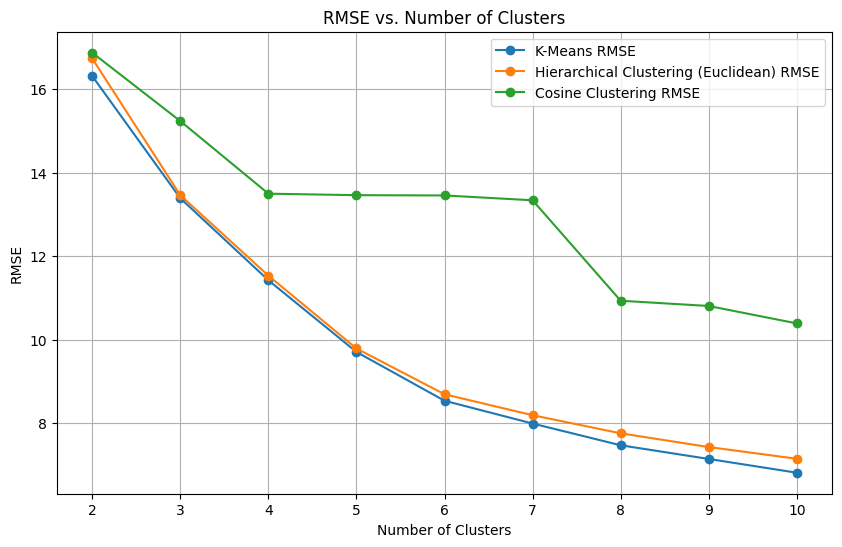

In [15]:
# Plot the RMSE vs Number of Clusters for each model
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, rmse_kmeans_list, marker='o', label='K-Means RMSE')
plt.plot(cluster_range, rmse_hierarchical_list, marker='o', label='Hierarchical Clustering (Euclidean) RMSE')
plt.plot(cluster_range, rmse_cosine_list, marker='o', label='Cosine Clustering RMSE')

plt.title('RMSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()



### Model comparison conclusions

Based on this plot, we can conclude that the K-means model is the one performing best in our case, very close with hierarchical clustering model. The cosine distance similarity does not seem to yield good results with the data analyzed in this project.

In terms of number of clusters, the optimal value seems to be 5 as the RMSE starts to decrease much less for greater values. 6 and 7 could also be considered as the RMSE still decreases notably for these two values. However, for 8 and greater values the RMSE decreases is really very small. Therefore, will not take these numbers in our final conclusion and interpretation.

## 3. Results, discussion and conclusion

We will now use the selected model and number of clusters (K-Means, 5 or 7 clusters) to discuss the results and interpretation in the business problem we are studying. 

To help that interpretation, we will produce the corresponding plots of Annual Income vs Spending for further comment:

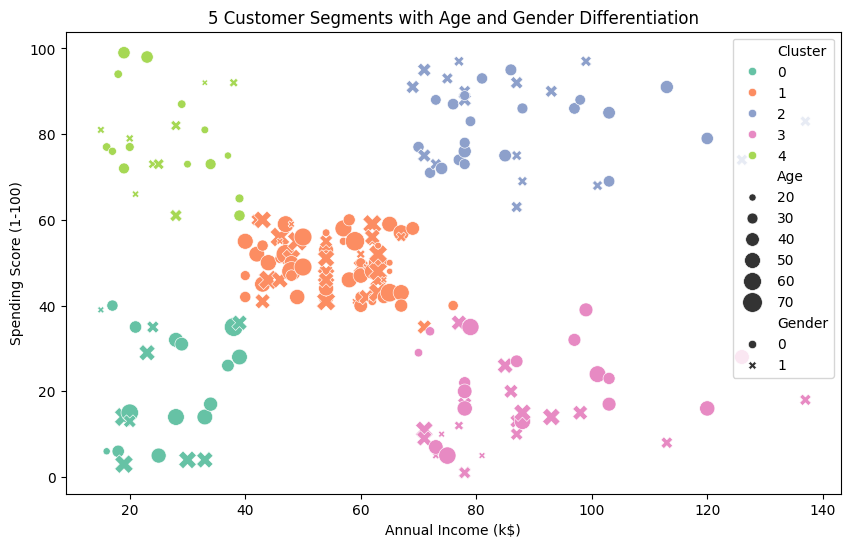

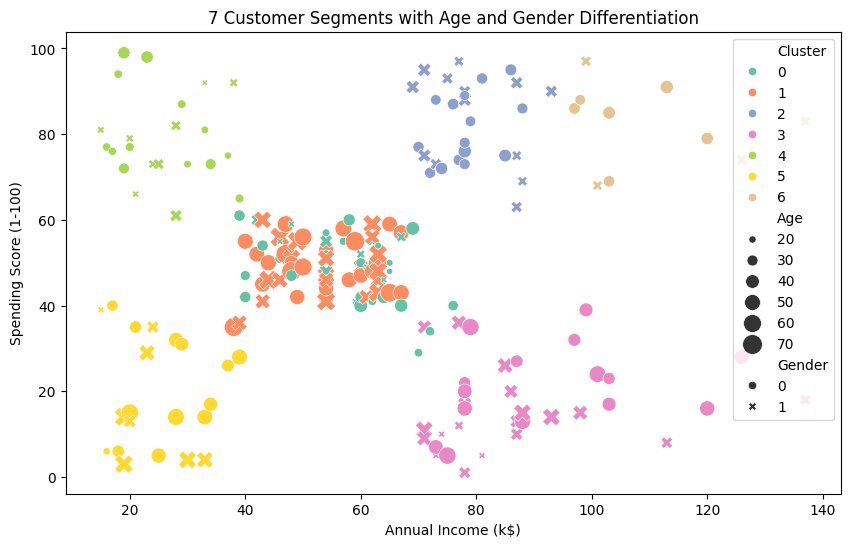

In [16]:
# Select the features for clustering including 'Gender'
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Define the model with a predefined number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Visualize clusters considering both Age (size) and Gender (style)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    style='Gender', 
    size='Age', 
    data=df, 
    sizes=(20, 200), 
    palette='Set2'
)
plt.title('5 Customer Segments with Age and Gender Differentiation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# Define the model with a predefined number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

## Visualize clusters considering both Age (size) and Gender (style)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    style='Gender', 
    size='Age', 
    data=df, 
    sizes=(20, 200), 
    palette='Set2'
)
plt.title('7 Customer Segments with Age and Gender Differentiation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Cluster interpretations

#### 5-clusters model

In this model appear 5 well delineated customer segmentations:

1. Older low earners, low spenders (dark green)
2. Younger low earners, high spenders (light green)
3. Middle earners, middle spenders (orange)
4. Older high earners, low spenders (pink)
5. Younger high earners, high spenders (purple)

In this segmentation, gender does not appear to play any role as we see that gender is uniformly distributed within clusters. However, age emerges as a meaningful varible as well as younger consumers tend to spend more than older customers in the same annual income range.

#### 7-clusters model

In this model appear 7 not so well defined customer segmentations:

1. Older low earners, low spenders (yellow)
2. Younger low earners, high spenders (light green)
3. Older predominantly female middle earners, middle spenders (orange)
4. Younger, predominantly male middle earners, middle spenders (dark green)
5. Older high earners, low spenders (pink)
6. Younger moderately high earners, high spenders (purple)
7. Younger, predominantly male highest earners, high spenders (beige)


This model appear to assign a role to gender to create two segments in the middle earners group. Also it might play a role in the split of high earners, high spenders group although annual income will still be the dominant variable for segmentation.

In view of this results, we believe that the best segmentation model is the one with 5 clusters. 

The new two segmentations created by the additional 2 clusters do not seem to bring any meaningful business impact as the spending of the two new segments is basically the same. Therefore there is no justification in adding complexity to the model. 

Hence our recommended model for this business problem to segment the customer population is the 5-cluster model based on K-means.



## Conclusion

In this customer segmentation project, we explored various clustering models to identify distinct customer segments within the dataset. We focused on three methods: **K-Means**, **Hierarchical Clustering (Euclidean distance)**, and **Cosine Distance Clustering**. Through careful analysis, including the evaluation of RMSE (Root Mean Squared Error) across different numbers of clusters, we determined that the **K-Means** model with **5 clusters** offers the most effective and actionable segmentation. 
We also attempted a dimensionality reduction using **PCA**, but -as expected-it did not yield any significant different as, in our case, the number of dimensions is very small.


### Justification for Choosing K-Means and 5 Clusters

1. **RMSE Analysis:**
   - The RMSE vs. Number of Clusters graph demonstrates that the K-Means model consistently delivers the lowest RMSE values compared to the other clustering methods. Lower RMSE values indicate tighter clustering around centroids, signifying better clustering performance.
   - Particularly at 5 clusters, the RMSE is significantly lower, suggesting that this number of clusters is sufficient for capturing the primary customer segments without introducing unnecessary complexity.

2. **Cluster Interpretation and Clarity:**
   - The K-Means model revealed five well-defined customer segments:
     1. **Older low earners, low spenders**
     2. **Younger low earners, high spenders**
     3. **Middle earners, middle spenders**
     4. **Older high earners, low spenders**
     5. **Younger high earners, high spenders**
     
   - These segments are clearly delineated, providing actionable insights into customer behavior based on a combination of income, spending, and age. These segments can be directly utilized to tailor marketing and business strategies.

3. **Impact of Age and Annual Income:**
   - The pair plot analysis highlighted **annual income** and **age** as the most influential variables in the segmentation process. Customers are naturally divided into distinct economic tiers, with age further refining the segments within these tiers. Notably, younger customers within the same income range tend to spend more than older customers.
   - **Annual income** emerged as the most critical variable for segmentation, while **age** provided valuable secondary insights, enhancing the understanding of spending behaviors within each income group.

4. **Gender Analysis:**
   - The visualization of clusters considering gender indicated that gender does not significantly influence the cluster formation. Both male and female customers are uniformly distributed across clusters, reinforcing the notion that income and spending behavior are the primary factors driving segmentation, with gender playing a minimal role.

5. **Comparison with the 7-Cluster Model:**
   - The 7-cluster model introduced additional complexity by segmenting middle earners and high earners based on gender. However, this added complexity did not yield substantial new insights or business value. The spending patterns within these additional segments closely mirrored those in the 5-cluster model, making the extra complexity unnecessary.

### Final Recommendation

Given the analysis, we recommend adopting the **5-cluster K-Means model** for customer segmentation. This model provides clear and actionable segments based on income and spending patterns, complemented by age as a secondary factor. The additional clusters in the 7-cluster model do not justify the complexity, as they do not offer meaningful differences that would impact business decisions. Therefore, the 5-cluster model is the optimal choice for this segmentation task, enabling businesses to effectively target different economic tiers within the customer base.

### Further Research
By incorporating additional data, exploring advanced techniques, and validating the segmentation with real-world testing, the business can refine its understanding of the customer base and further enhance its marketing effectiveness.
